In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# ignore imputation warnings from pymc
# ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
import warnings
from pymc import ImputationWarning

warnings.filterwarnings("ignore", category=ImputationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from birdcall_distribution.data import prepare_dataframe

prep_df, W = prepare_dataframe(
    "../data/ee_v3_western_us_2.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=3,
)
prep_df.head()

,primary_label,grid_id,y,region,grid_size,population_density,elevation_p5,elevation_p50,elevation_p95,LST_Day_1km_p5,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
adjacency_idx,,,,,,,,,,,,,,,,,,,,,
0,other,-103_37,9.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,normoc,-103_37,3.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,wesmea,-103_37,2.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,houfin,-103_37,NaN,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
1,normoc,-103_39,NaN,western_us,2,72311.465983,933.400010,1109.527419,1373.500000,23.530828,...,0,0,26593,1,11191,14,0,0,5,5


random_intercept_model


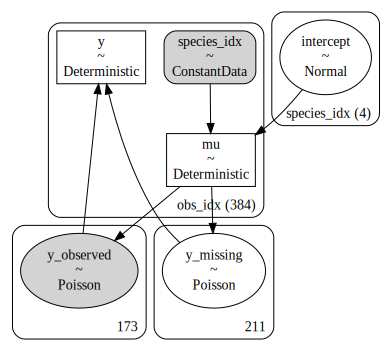

pooled_intercept_pooled_covariate_model


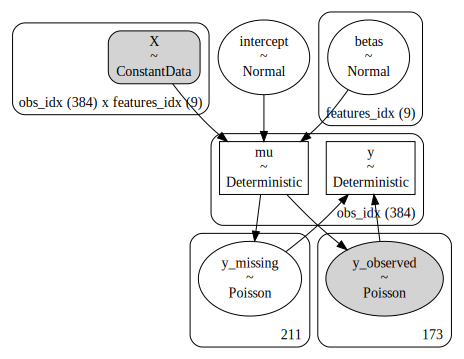

pooled_intercept_random_covariate_model


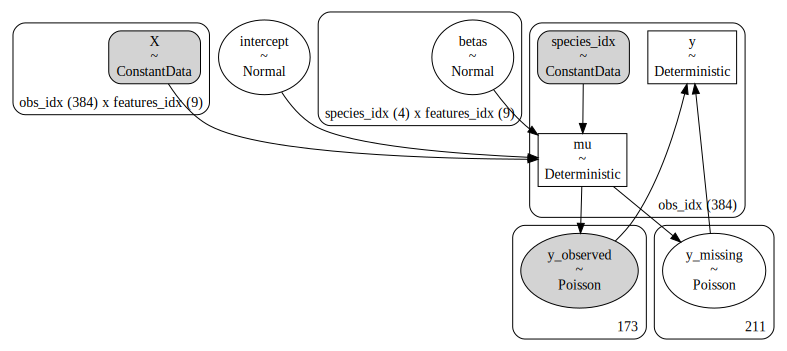

random_intercept_pooled_covariate_model


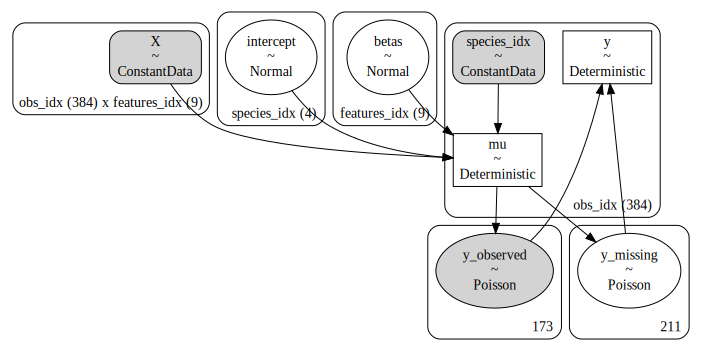

random_intercept_random_covariate_model


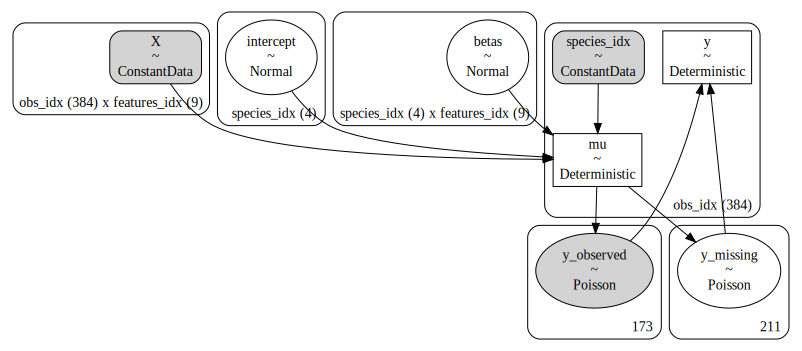

random_intercept_car_model


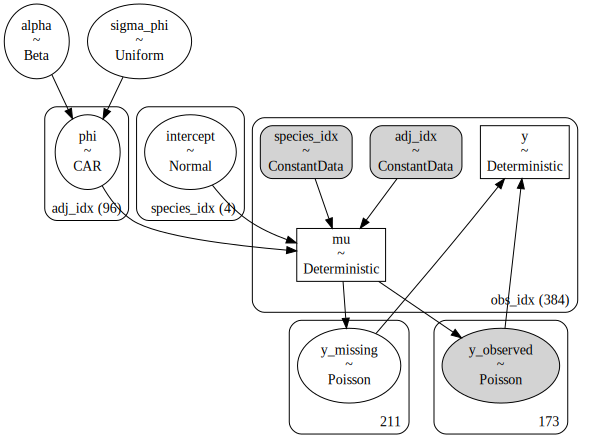

pooled_intercept_car_model


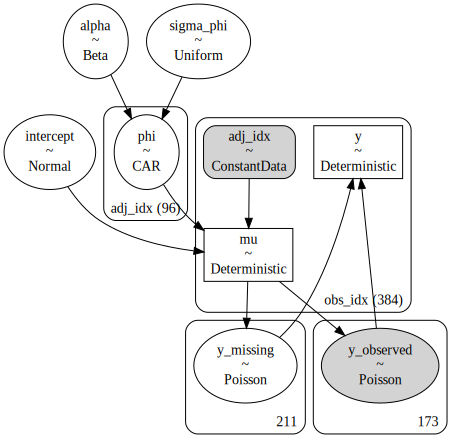

pooled_intercept_random_covariate_car_model


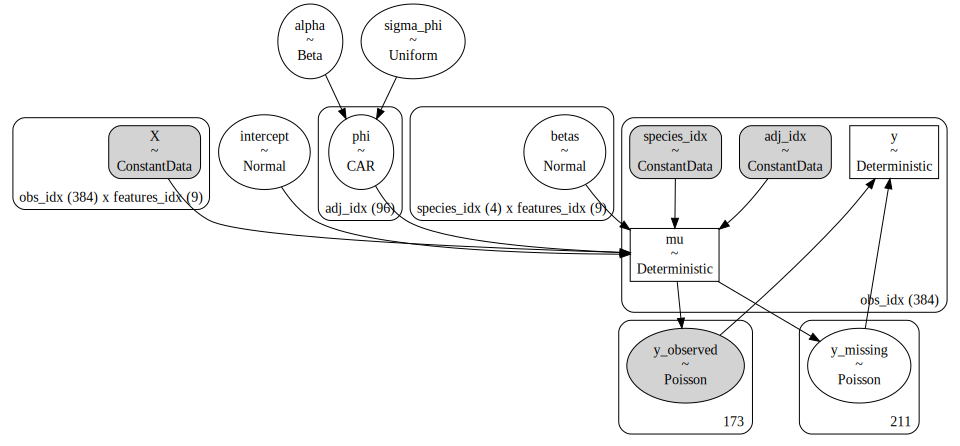

random_intercept_pooled_covariate_car_model


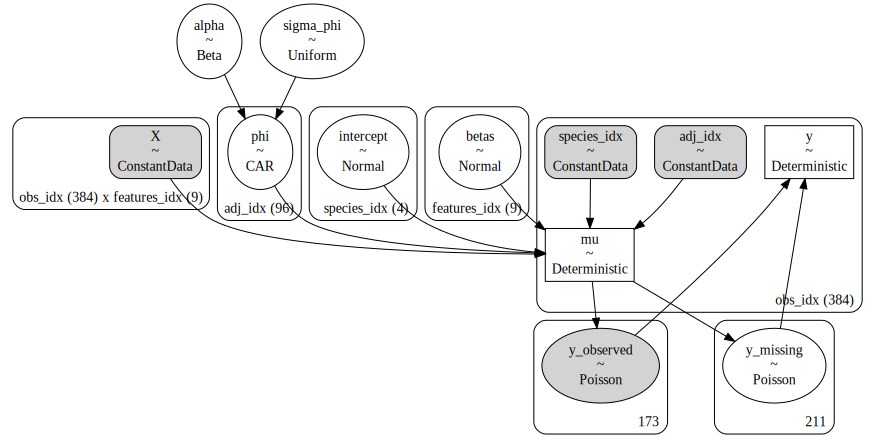

In [4]:
from birdcall_distribution import model
import pymc as pm
import arviz as az

# display function
from IPython.display import display

models = {
    "random_intercept_model": model.make_random_intercept_model,
    "pooled_intercept_pooled_covariate_model": model.make_pooled_intercept_pooled_covariate_model,
    "pooled_intercept_random_covariate_model": model.make_pooled_intercept_random_covariate_model,
    "random_intercept_pooled_covariate_model": model.make_random_intercept_pooled_covariate_model,
    "random_intercept_random_covariate_model": model.make_random_intercept_random_covariate_model,
    "random_intercept_car_model": model.make_random_intercept_car_model,
    "pooled_intercept_car_model": model.make_pooled_intercept_car_model,
    "pooled_intercept_random_covariate_car_model": model.make_pooled_intercept_random_covariate_car_model,
    "random_intercept_pooled_covariate_car_model": model.make_random_intercept_pooled_covariate_car_model,
}

# test that all the models are dimensionally correct
for name, func in models.items():
    print(name)
    m = func(prep_df, W)
    # graphviz
    display(pm.model_to_graphviz(m))

In [5]:
# test that all the models can be sampled correctly
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    with model:
        trace = pm.sample(10, tune=0, cores=1, chains=1)

Only 10 samples in chain.


random_intercept_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


pooled_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.


pooled_intercept_random_covariate_model


Only 10 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


random_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


random_intercept_random_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


random_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


pooled_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_random_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


random_intercept_pooled_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.


In [6]:
# now sample everything for real, and store the traces
traces = {}
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    with model:
        trace = pm.sample(2000, tune=1000, cores=8, target_accept=0.9)
    traces[name] = trace

random_intercept_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 62 seconds.


pooled_intercept_pooled_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 72 seconds.


pooled_intercept_random_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 84 seconds.


random_intercept_pooled_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 74 seconds.


random_intercept_random_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 90 seconds.


random_intercept_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 112 seconds.


pooled_intercept_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 109 seconds.


pooled_intercept_random_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 285 seconds.


random_intercept_pooled_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 279 seconds.


In [7]:
ranking = az.compare(traces, ic="waic", scale="deviance")
ranking

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
random_intercept_pooled_covariate_car_model,0,1297.635702,163.208242,0.000000,6.005189e-01,132.444650,0.000000,True,deviance
random_intercept_car_model,1,1300.686583,164.773519,3.050881,1.501271e-11,131.010701,5.679058,True,deviance
pooled_intercept_random_covariate_car_model,2,1550.137776,272.287598,252.502074,1.975617e-01,96.598952,150.921437,True,deviance
random_intercept_random_covariate_model,3,2952.781455,486.518910,1655.145753,3.923182e-02,444.482367,404.624107,True,deviance
random_intercept_pooled_covariate_model,4,3003.080016,340.527039,1705.444314,1.203979e-01,506.821898,445.010924,True,deviance
pooled_intercept_random_covariate_model,5,3239.009492,536.666594,1941.373789,3.377973e-11,456.203014,424.667718,True,deviance
pooled_intercept_car_model,6,3378.051401,625.367452,2080.415698,3.378683e-02,427.214157,414.656605,True,deviance
random_intercept_model,7,4024.811831,115.916931,2727.176128,4.015298e-03,802.690356,777.345910,True,deviance
pooled_intercept_pooled_covariate_model,8,4306.350883,443.303711,3008.715180,4.487672e-03,849.145550,822.525691,True,deviance


In [31]:
formatted = (
    ranking.iloc[:, :-2]
    .round(2)
    .rename(columns={"index": "model name"})
    .drop(columns=["weight"])
)
formatted

,rank,elpd_waic,p_waic,elpd_diff,se,dse
random_intercept_pooled_covariate_car_model,0,1297.64,163.21,0.00,132.44,0.00
random_intercept_car_model,1,1300.69,164.77,3.05,131.01,5.68
pooled_intercept_random_covariate_car_model,2,1550.14,272.29,252.50,96.60,150.92
random_intercept_random_covariate_model,3,2952.78,486.52,1655.15,444.48,404.62
random_intercept_pooled_covariate_model,4,3003.08,340.53,1705.44,506.82,445.01
pooled_intercept_random_covariate_model,5,3239.01,536.67,1941.37,456.20,424.67
pooled_intercept_car_model,6,3378.05,625.37,2080.42,427.21,414.66
random_intercept_model,7,4024.81,115.92,2727.18,802.69,777.35
pooled_intercept_pooled_covariate_model,8,4306.35,443.30,3008.72,849.15,822.53


In [32]:
print(formatted.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  rank &  elpd\_waic &  p\_waic &  elpd\_diff &      se &     dse \\
\midrule
random\_intercept\_pooled\_covariate\_car\_model &     0 &    1297.64 &  163.21 &       0.00 &  132.44 &    0.00 \\
random\_intercept\_car\_model                  &     1 &    1300.69 &  164.77 &       3.05 &  131.01 &    5.68 \\
pooled\_intercept\_random\_covariate\_car\_model &     2 &    1550.14 &  272.29 &     252.50 &   96.60 &  150.92 \\
random\_intercept\_random\_covariate\_model     &     3 &    2952.78 &  486.52 &    1655.15 &  444.48 &  404.62 \\
random\_intercept\_pooled\_covariate\_model     &     4 &    3003.08 &  340.53 &    1705.44 &  506.82 &  445.01 \\
pooled\_intercept\_random\_covariate\_model     &     5 &    3239.01 &  536.67 &    1941.37 &  456.20 &  424.67 \\
pooled\_intercept\_car\_model                  &     6 &    3378.05 &  625.37 &    2080.42 &  427.21 &  414.66 \\
random\_intercept\_model                      &     7 &    4024.81 &  115.92 & 

C:\Users\acmiy\AppData\Local\Temp\ipykernel_47384\2487536844.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(formatted.to_latex())
